In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [63]:
df = pd.read_csv(r'..\data\raw\realtor-data.zip.csv')

In [64]:
sys.path.append('../src')
from utils.ClaseAbdon import DataFrameAnalyzer

In [65]:
# df = pd.read_csv(r'..\data\raw\realtor-data.csv')

In [66]:
df.shape

(2226382, 12)

In [67]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [68]:
df.tail()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24
2226381,108243.0,sold,580000.0,5.0,3.0,0.31,307704.0,Richland,Washington,99354.0,3615.0,2022-03-23


In [69]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [70]:
df.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [71]:
df[df.duplicated()]

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date


In [72]:
df_ob = df.select_dtypes('object')
for col in df_ob.columns:
    print(f'==========={col}===========')
    print(f'Numero de unicos: {df[col].nunique()}')
    print(f'Valores Unicos: {df[col].unique()}')
    print('\n')

===========status===========
Numero de unicos: 3
Valores Unicos: ['for_sale' 'ready_to_build' 'sold']


===========city===========
Numero de unicos: 20098
Valores Unicos: ['Adjuntas' 'Juana Diaz' 'Ponce' ... 'Tbd King Ave Pasco' 'Washtucna'
 'Kahlotus']


===========state===========
Numero de unicos: 55
Valores Unicos: ['Puerto Rico' 'Virgin Islands' 'Massachusetts' 'Connecticut'
 'New Hampshire' 'Vermont' 'New Jersey' 'New York' 'South Carolina'
 'Tennessee' 'Rhode Island' 'Virginia' 'Wyoming' 'Maine' 'Georgia'
 'Pennsylvania' 'West Virginia' 'Delaware' 'Louisiana' 'Ohio' 'California'
 'Colorado' 'Maryland' 'Missouri' 'District of Columbia' 'Wisconsin'
 'North Carolina' 'Kentucky' 'Michigan' 'Mississippi' 'Florida' 'Alabama'
 'New Brunswick' nan 'Texas' 'Arkansas' 'Idaho' 'Indiana' 'Illinois'
 'New Mexico' 'Iowa' 'Minnesota' 'South Dakota' 'Nebraska' 'North Dakota'
 'Montana' 'Oklahoma' 'Kansas' 'Oregon' 'Utah' 'Nevada' 'Washington'
 'Arizona' 'Hawaii' 'Guam' 'Alaska']


===========pr

### Primer contacto con los datos, vemos las dimensiones, valores unicos, duplicados, valores nulos.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [74]:
df['prev_sold_date'] = df['prev_sold_date'].str.replace('3019','2019')
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'])

### Convertimos a DateTime la columna 'prev_sold_date' para poder manejarla mejor mas adelante.

In [75]:
analyzer = DataFrameAnalyzer(df)
# Instaciamos clase.

In [76]:
analyzer.resumen()

,Columna,Tipo de Dato,Cardinalidad,% Cardinalidad,Valores Faltantes,% Valores Faltantes,Categoría
0,brokered_by,float64,110143,4.95,4533,0.20,Numérica Continua
1,status,object,3,0.00,0,0.00,Categórica Nominal
2,price,float64,102137,4.59,1541,0.07,Numérica Continua
3,bed,float64,99,0.00,481317,21.62,Numérica Continua
4,bath,float64,86,0.00,511771,22.99,Numérica Continua
5,acre_lot,float64,16057,0.72,325589,14.62,Numérica Continua
6,street,float64,2001358,89.89,10866,0.49,Numérica Continua
7,city,object,20098,0.90,1407,0.06,Categórica Nominal
8,state,object,55,0.00,8,0.00,Categórica Nominal
9,zip_code,float64,30334,1.36,299,0.01,Numérica Continua


### Vemos que el tipo de dato de cada columna es coherente, vemos que street tiene una alta cardinalidad, y otras muy bajas (todo entra en lo normal por el momento). Hay una alta cantidad de valores nulos en varias columnas como house_Size, prev_sold_date, bath, bed. MAs adelante eliminaremos o imputaremos segun lo que vayamos analizando.

In [77]:
analyzer.describe_numeric()

,count,mean,median,mode,std_dev,min,25%,50%,75%,max,skewness,kurtosis
brokered_by,2221849.0,5.293989e+04,52884.00,22611.00,3.064275e+04,0.0,23861.00,52884.00,79183.00,1.101420e+05,0.147393,-1.124438e+00
price,2224841.0,5.241955e+05,325000.00,350000.00,2.138893e+06,0.0,165000.00,325000.00,550000.00,2.147484e+09,546.303063,4.924232e+05
bed,1745065.0,3.275841e+00,3.00,3.00,1.567274e+00,1.0,3.00,3.00,4.00,4.730000e+02,56.654813,1.297152e+04
bath,1714611.0,2.496440e+00,2.00,2.00,1.652573e+00,1.0,2.00,2.00,3.00,8.300000e+02,152.414997,6.587415e+04
acre_lot,1900793.0,1.522303e+01,0.26,0.17,7.628238e+02,0.0,0.15,0.26,0.98,1.000000e+05,106.280285,1.254232e+04
street,2215516.0,1.012325e+06,1012765.50,1916862.00,5.837635e+05,0.0,506312.75,1012765.50,1521173.25,2.001357e+06,-0.009230,-1.213007e+00
zip_code,2226083.0,5.218668e+04,48382.00,33993.00,2.895408e+04,0.0,29617.00,48382.00,78070.00,9.999900e+04,0.092234,-1.313181e+00
house_size,1657898.0,2.714471e+03,1760.00,1200.00,8.081635e+05,4.0,1300.00,1760.00,2413.00,1.040400e+09,1286.900100,1.656700e+06


### Con respecto a price, vemos que entre el min y max hay mucha diferencia por lo que los datos estan sesgados. Lo mismo con bed y bath.

In [78]:
analyzer.describe_categorical()

,unique_values,most_frequent,frequency,proportion
status,3,for_sale,1389306,62.40
city,20098,Houston,23862,1.07
state,55,Florida,249432,11.20


### el 63% de las casas estan en venta, y la ciudad mas frecuente es Houston con 1% de los datos. El estado mas frecuente es florida con un 11%.

In [79]:
df2 = df[(df['price'] > 0) & (df['house_size'] > 0)]

# Vamos a filtrar por las casas con un precio mayor a 0 y tamaño mayor a 0. 
# damos por hecho que son errores a la hora de extraer los datos, debido a que una casa de coste 0 o con tamaño 0 no existe

#### Tratamiento de missing

In [80]:
missing = df2.isnull().sum()
missing_pct = (missing / df2.shape[0]) * 100
round(missing_pct,2)

brokered_by        0.16
status             0.00
price              0.00
bed                1.23
bath               2.64
acre_lot          16.62
street             0.40
city               0.02
state              0.00
zip_code           0.01
house_size         0.00
prev_sold_date    23.42
dtype: float64

In [81]:
df2 = df2.dropna(subset=['street','city','state','zip_code'])
# Eliminamos los pocos missing que hay en estas columnas.

In [82]:
bins = [0, 500, 1000, 1500, 2000, 3000, 5000, 10000, np.inf]
labels = [1,2,3,4,5,6,7,8]

df2['size_bin'] = pd.cut(df2['house_size'], bins=bins, labels=labels)
# creamos bins y labels para poder manejar de el tamaño de las casas (muy sesgadas)
# XS = 1
# S = 2
# M = 3
# ML = 4
# L = 5
# XL = 6
# XXL = 7
# Mansion = 8

In [83]:
df2['bed'] = df2.groupby('size_bin')['bed'].transform(lambda x: x.fillna(x.median()))
# Imputamos bed segun la categoria del tamaño.

df2['bath'] = df2.groupby('bed')['bath'].transform(lambda x: x.fillna(x.median()))
df2['bath'].fillna(df2['bath'].median(),inplace=True)
# Imputamos con la media segun Bed, y bed segun el tamaño de la casa.

df2['brokered_by'].fillna(df2['brokered_by'].median(),inplace=True)

In [84]:
df2 = df2[df2['house_size'] <= 1_000_000]
# Casas con mas de 1_000_000 las eliminamos 

In [85]:
df2.isnull().sum()

brokered_by            0
status                 0
price                  0
bed                    0
bath                   0
acre_lot          272747
street                 0
city                   0
state                  0
zip_code               0
house_size             0
prev_sold_date    385141
size_bin               0
dtype: int64

In [86]:
df2 = df2.drop(columns=['acre_lot','prev_sold_date'])
# Eliminamos acre_lor y prev_sold_date por alta cantidad de nulos

In [87]:
df2['property_type'] = df2['size_bin'].apply(lambda x: 'Mansion' if x == 8 else 'House')

#### Tratamiento de outliers.

## Conclusión sobre los outliers.
Durante el análisis exploratorio del dataset inmobiliario, se identifican numerosos valores extremos en variables como price, house_size, bed, bathy acre_lot. Aunque estos valores podrían parecer atípicos desde una perspectiva estadística tradicional, se decidió no eliminarlos de forma masiva , por las siguientes razones:

#### Contexto del dominio real
- En el mercado inmobiliario de EE.UU. es común encontrar propiedades con precios muy elevados, terrenos extensos y construcciones de gran tamaño (mansiones, fincas, incluso complejos comerciales). Estos datos, aunque extremos, reflejan casos reales y son relevantes para ciertos segmentos del análisis.

#### Segmentación específica de valores atípicos válidos
- En lugar de eliminarlos, se creó una segmentación por tamaño ( size_bin) para separar viviendas normales de mansiones. Esto permite analizar ambos conjuntos de forma independiente, evitando distorsiones sin perder información valiosa.

#### Tratamiento puntual de errores reales
- Solo se eliminaron aquellos valores claramente erróneos o inviables, como propiedades con más de 1 millón de acre_loto house_size, que exceden cualquier escala razonable incluso en propiedades comerciales.

#### Enriquecimiento del análisis
- Los valores atípicos, correctamente tratados y contextualizados, pueden aportar insights clave sobre el mercado de lujo, propiedades atípicas o errores en la carga de datos. Su presencia enriquece el análisis en lugar de empobrecerlo .

------------------------------------------------

### Análisis univariante.

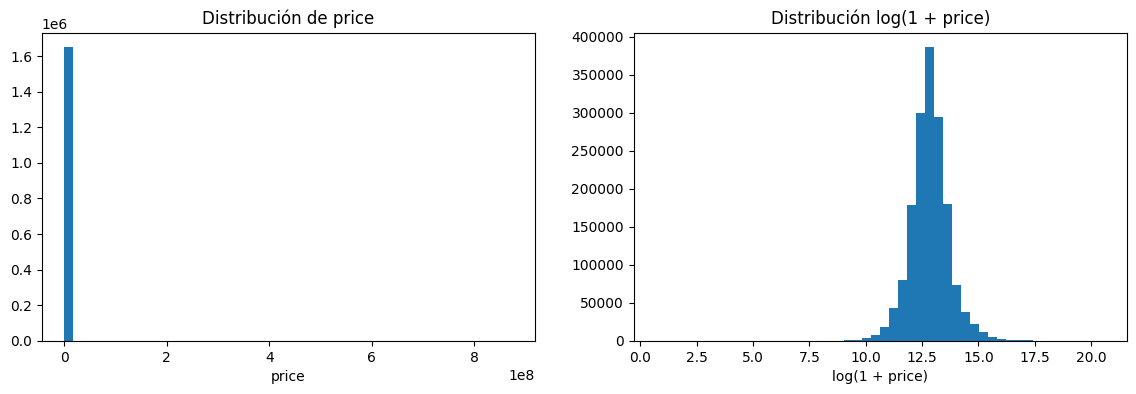

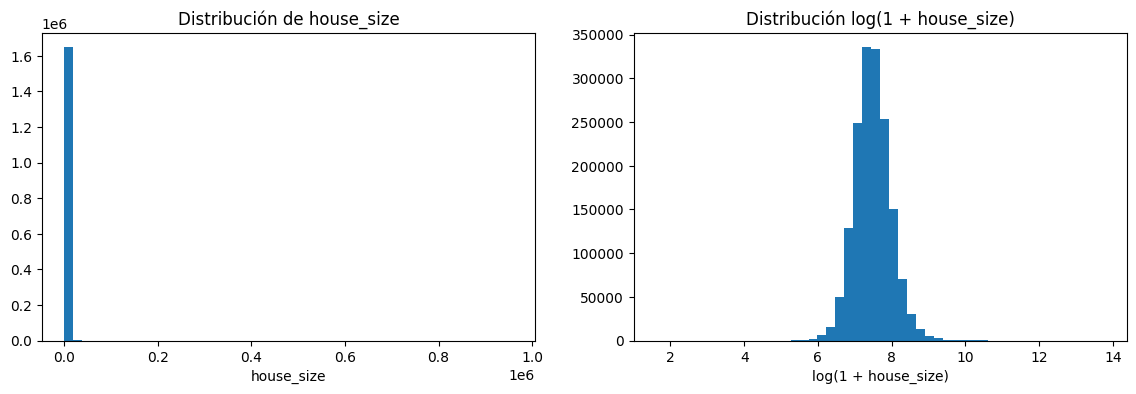

In [88]:
numeric_cols = ['price', 'house_size']
filtered = df[df['house_size'] <= 10000] # Filtramos para mejor visión.

for col in numeric_cols:
    fig, axs = plt.subplots(1, 2, figsize=(14, 4))

    # Histograma normal
    axs[0].hist(df2[col].dropna(), bins=50)
    axs[0].set_title(f'Distribución de {col}')
    axs[0].set_xlabel(col)

    # Histograma con log1p
    axs[1].hist(np.log1p(df2[col]), bins=50)
    axs[1].set_title(f'Distribución log(1 + {col})')
    axs[1].set_xlabel(f'log(1 + {col})')

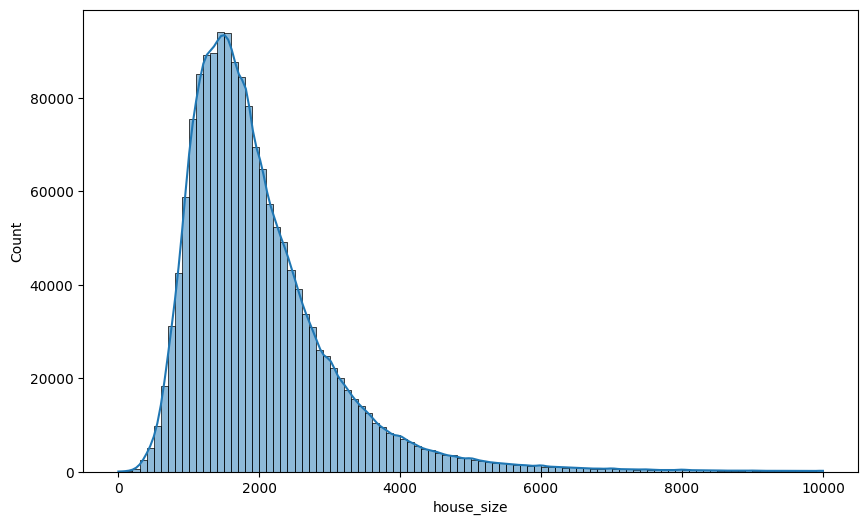

In [89]:
plt.figure(figsize=(10,6))
sns.histplot(
    filtered['house_size'],
    bins=100,
    kde=True);

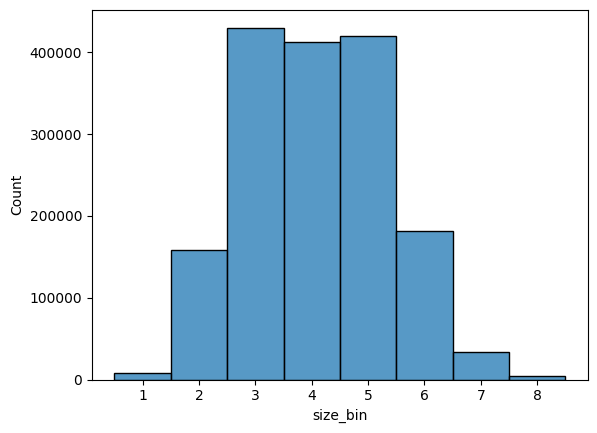

In [90]:
sns.histplot(df2['size_bin']);

### Ambas variables están fuertemente sesgadas a la derecha , con muchos valores bajos y unos pocos extremadamente altos. La transformación logarítmica (log1p) mejora mucho la distribución, haciéndola más simétrica. Tambien el filtardo de house_size ayuda mucho a la visión de la mayoria de casas.

In [91]:
df2['bed_group'] = df2['bed'].apply(lambda x: '10+' if x > 10 else str(int(x)))
df2['bath_group'] = df2['bath'].apply(lambda x: '10+' if x > 10 else str(int(x)))

# Agrupamos bed y bath para una mejor visualizacion.

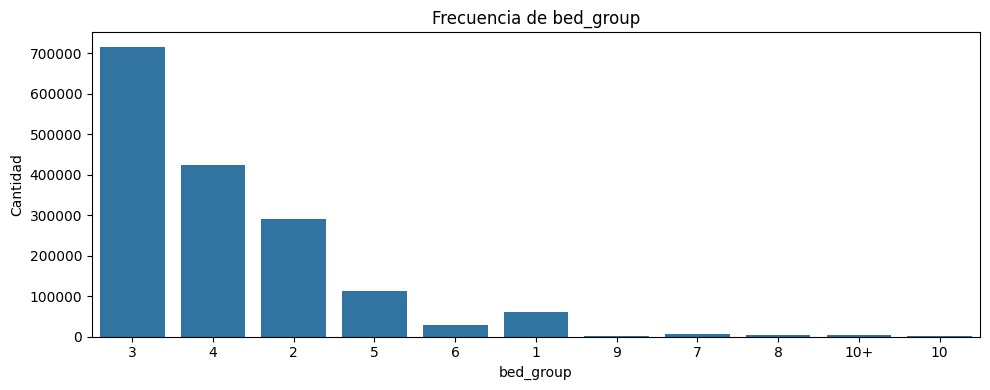

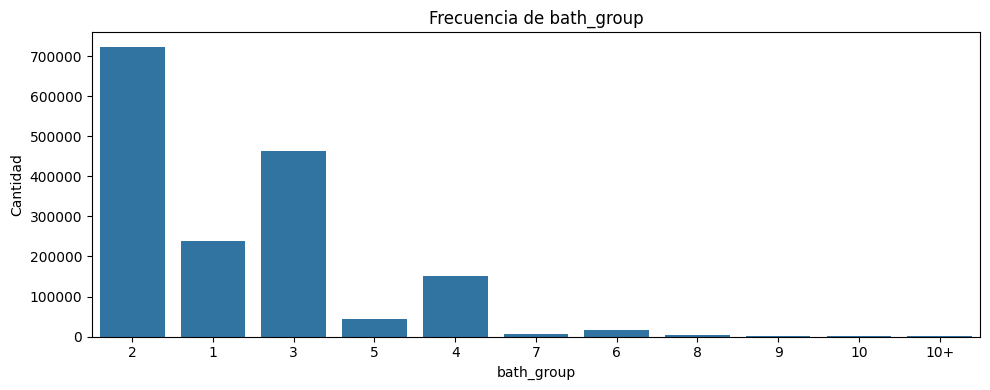

In [92]:
discrete_cols = ['bed_group', 'bath_group']

# Crear countplots
for col in discrete_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=df2[col])
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel("Cantidad")
    plt.tight_layout()
    plt.show()

#### La mayoría de las propiedades tienen entre 2 y 4 habitaciones y 1 a 3 baños , lo que encaja con viviendas unifamiliares estándar. A partir de 7–8 en adelante, las frecuencias caen restrictivas, y valores como 10, 20 o más son poco frecuentes y probablemente propiedades comerciales o de lujo. Por eso, se agruparon los valores mayores o iguales a 10 en la categoría "10+" , lo que mejora la legibilidad y análisis posterior.

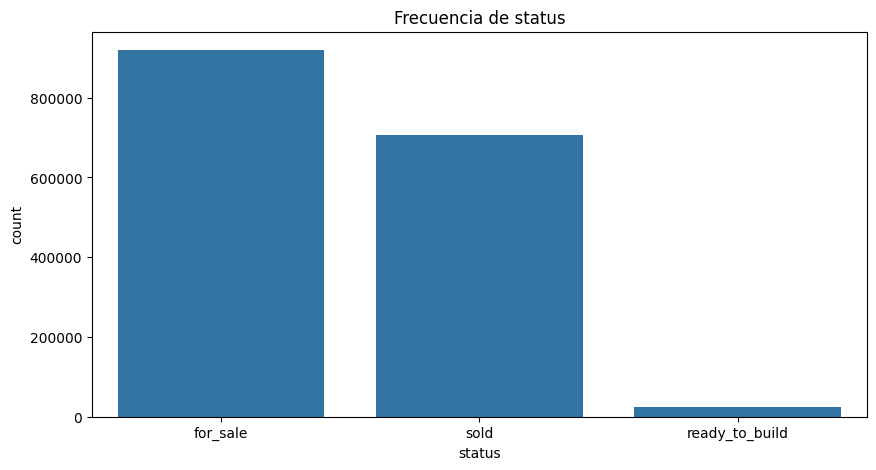

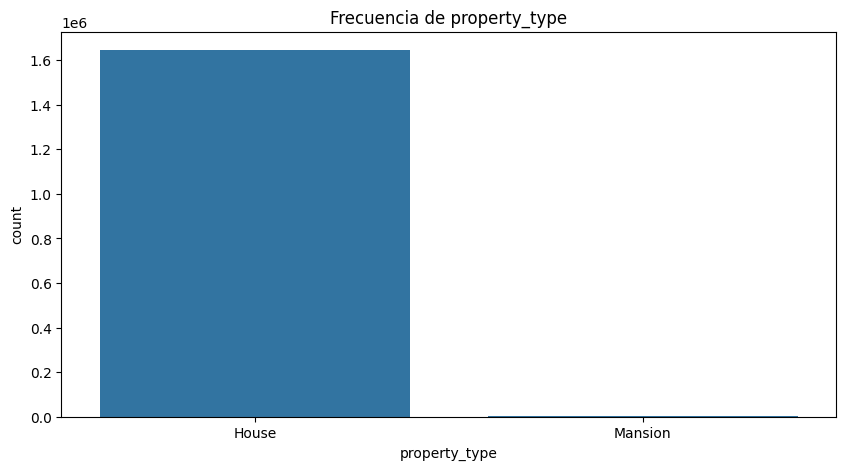

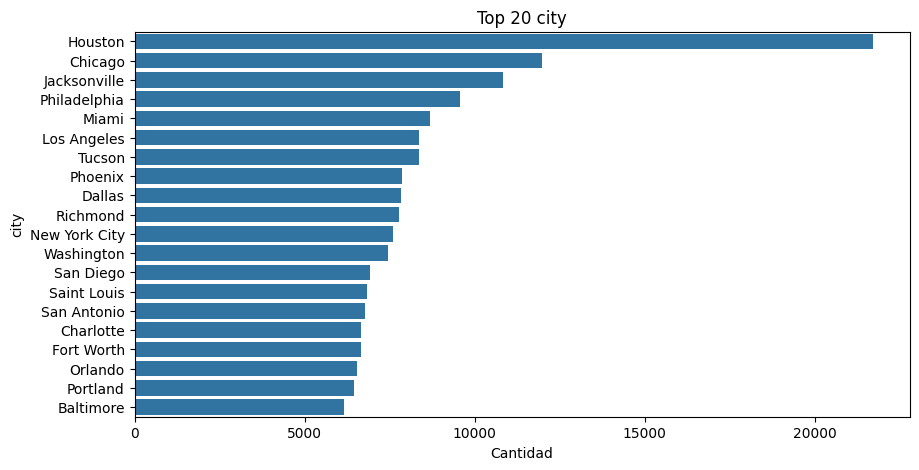

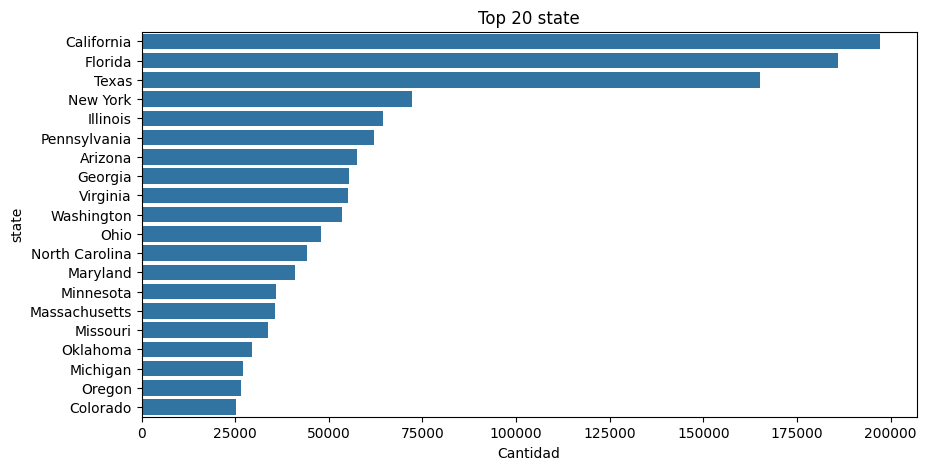

In [93]:
for col in ['status', 'property_type']:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df2, order=df2[col].value_counts().index)
    plt.title(f'Frecuencia de {col}')

for col in ['city', 'state']:
    top_vals = df2[col].value_counts().head(20)
    plt.figure(figsize=(10, 5))
    sns.barplot(y=top_vals.index, x=top_vals.values)
    plt.title(f'Top 20 {col}')
    plt.xlabel('Cantidad')
    plt.ylabel(col)

In [94]:
print(f"street: {df2['street'].nunique()} valores únicos de {len(df2)} registros.")

street: 1501235 valores únicos de 1649585 registros.


### status
La mayoría de las propiedades están en estado "for_sale" , seguidas por "sold". Solo una pequeña fracción aparece como "ready_to_build", lo que indica que la mayoría del inventario está compuesto por propiedades ya construidas o en venta activa.

### property_type
El 99,9% de las propiedades están clasificadas como "Casa" , mientras que "Mansión" representa una fracción mínima del conjunto de datos. Esto refleja una gran concentración del mercado en viviendas unifamiliares estándar.

### city
Las ciudades con más propiedades listadas son Houston, Chicago y Jacksonville , todas con más de 10,000 registros. Este dato puede indicar zonas de alta actividad inmobiliaria o cobertura más amplia del scraping/fuente de datos.

### state
Los estados con mayor número de propiedades en el dataset son California, Florida y Texas , que también son algunos de los estados más poblados de EE. UU. UU. Esto sugiere que las oportunidades de análisis y modelos pueden beneficiarse de una segmentación geográfica.

## Análisis bivariante

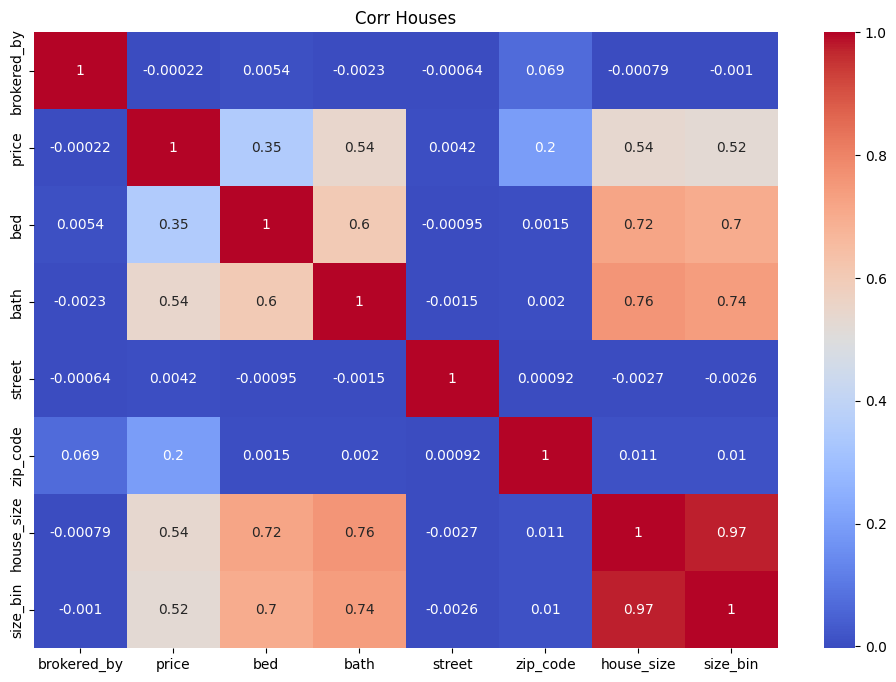

In [95]:
df2['size_bin'] = df2['size_bin'].astype('int')
df_corr = df2.corr(numeric_only=True,method='spearman')
plt.figure(figsize=(12,8))
plt.title('Corr Houses')
sns.heatmap(df_corr,annot=True, cmap='coolwarm');

La variable price muestra correlaciones moderadas con: bath(0,54), house_size(0,54) size_bin(0,52), bed(0.35). Esto indica que el número de baños y el tamaño de la casa son los principales predictores del precio.

house_size está fuertemente correlacionado con: size_bin(0.9 ), como era de esperarse, ya que size_binse deriva de esta.

bath(0.76) y bed(0.72), las casas más grandes suelen tener más habitaciones y baños.

Variables como street, zip_code o brokered_by no aportan correlaciones significativas con price.

El precio se asocia principalmente con el tamaño de la propiedad y la cantidad de baños, mientras que otras variables como el nombre de la calle o el código postal no muestran relación lineal clara. Esto valida que house_size, bath y bed son buenas candidatas para modelado predictivo.

In [96]:
df2['log_price'] = np.log1p(df2['price'])

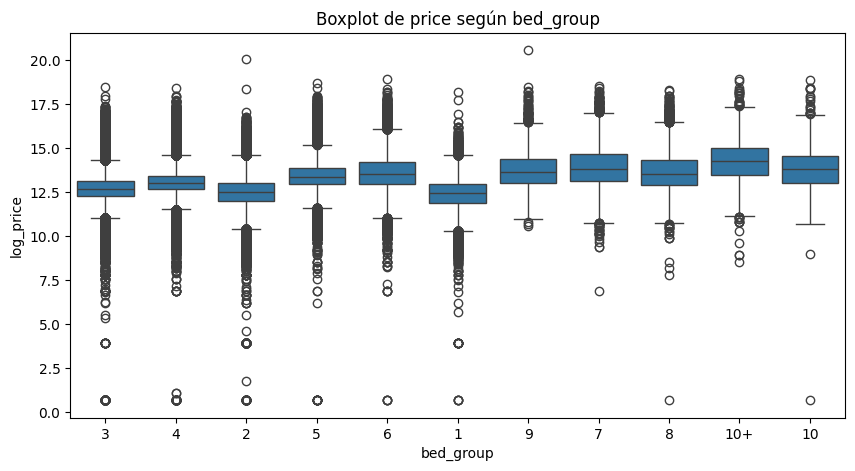

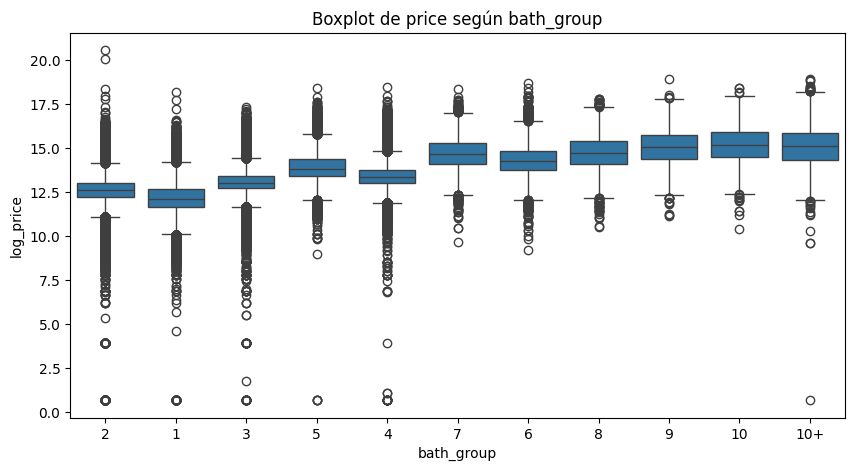

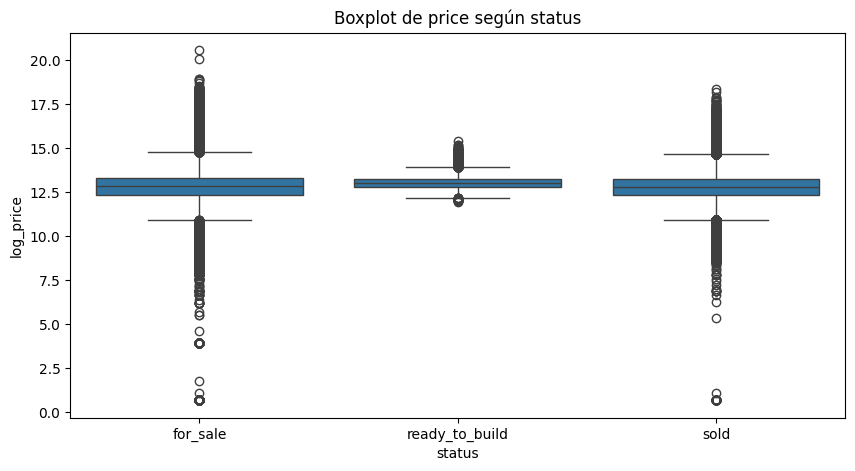

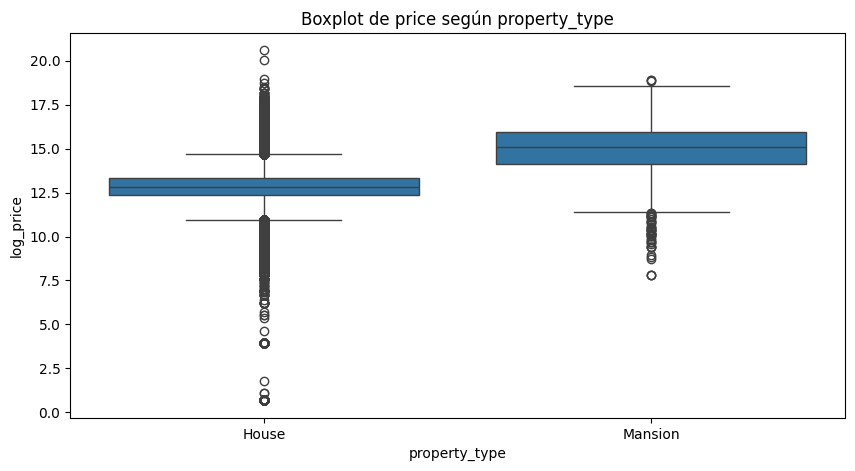

In [97]:
categorical_cols = ['bed_group', 'bath_group', 'status', 'property_type']

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, y='log_price', data=df2)
    plt.title(f'Boxplot de price según {col}');

# usamos log_price para mejor visualizacion en las distribuciones.

### log_price según bed_group
Se observa una tendencia general al alza del precio a medida que aumentan las habitaciones, aunque con algunas irregularidades en grupos intermedios (por ejemplo, 2 y 4 dormitorios muestran precios medianos más bajos que 3). La variabilidad también crece ligeramente con el número de habitaciones.

### log_price según bath_group
A diferencia de bed, la relación entre precio y número de baños es mucho más clara y progresiva: a mayor número de baños, mayor precio. Esto refuerza lo visto en la matriz de valoración, donde bath tenía una mayor valoración con priceque bed.

### log_price según status
Las propiedades con estatus "for_sale" y "sold" presentan distribuciones de precio similares. Las propiedades "ready_to_build" tienen precios más concentrados y sin valores extremos, lo cual es esperable al ser desarrollos estándar sin edificación aún.

### log_price según property_type
Como era de esperar, las "Mansion" tienen un precio significativamente más alto que las "House". Además, el rango intercuartílico y la dispersión de precios también es mucho mayor en el grupo Mansion, lo que refleja la diversidad de propiedades de lujo.

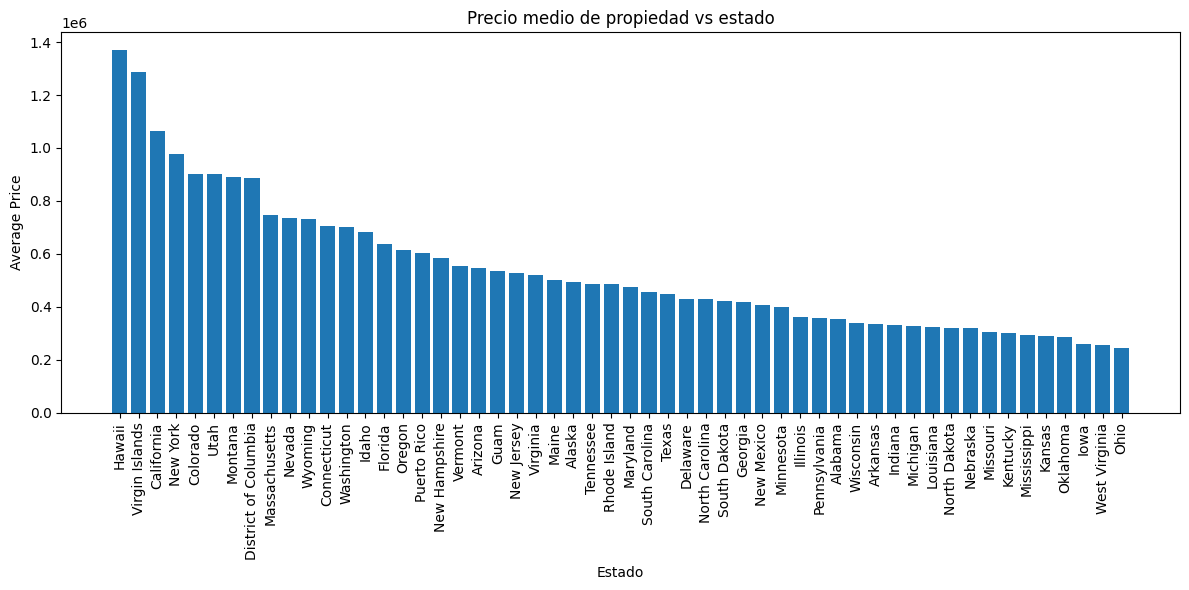

In [98]:
avg_price_state = df2.groupby('state')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.bar(avg_price_state.index, avg_price_state.values)
plt.title('Precio medio de propiedad vs estado')
plt.ylabel('Average Price')
plt.xlabel('Estado')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Los estados con los precios medios más altos son Hawái, California, Nueva York y Islas virgenes, superando los 900.000 USD en promedio. Esto refleja zonas con alto costo de vida y mercado inmobiliario de lujo o urbano denso.

En contraste, los estados con precios más bajos (como Ohio, Iowa y Virginia Occidental) tienen promedios cercanos a los 250.000 USD, lo que sugiere un mercado más asequible, posiblemente rural o de baja demanda.

Esta fuerte variabilidad regional evidencia la necesidad de segmentar los análisis o modelos por ubicación geográfica, ya que el estado tiene un impacto significativo en el precio de la propiedad.

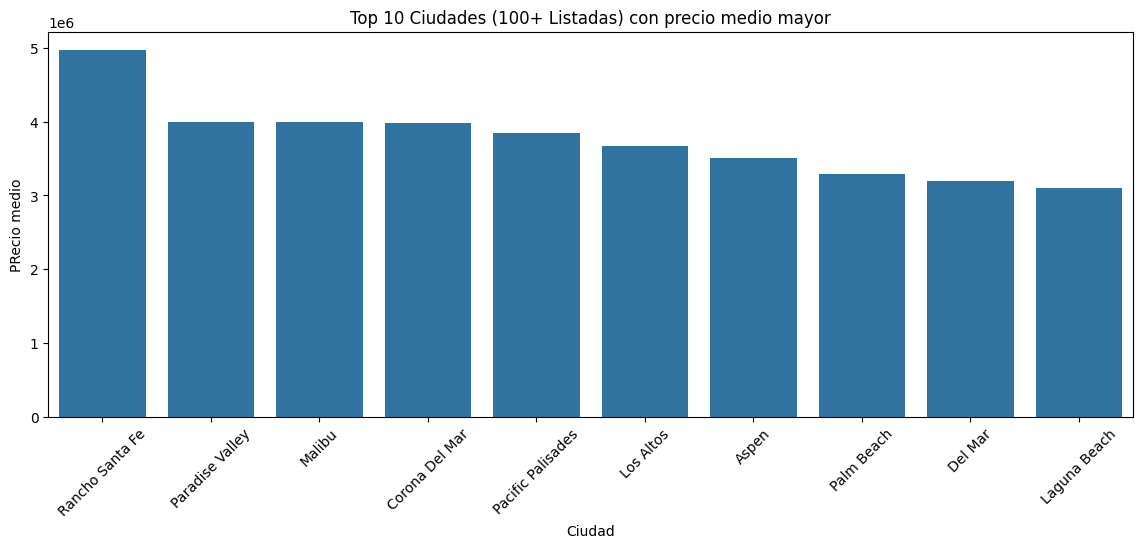

In [99]:
city_counts = df2['city'].value_counts()
valid_cities = city_counts[city_counts > 100].index
df2_valid = df2[df2['city'].isin(valid_cities)]

top_cities_cleaned = df2_valid.groupby('city')['price'].median().sort_values(ascending=False).head(10)
plt.figure(figsize=(14,5))
sns.barplot(x=top_cities_cleaned.index, y=top_cities_cleaned.values)
plt.title('Top 10 Ciudades (100+ Listadas) con precio medio mayor')
plt.ylabel('PRecio medio')
plt.xlabel('Ciudad')
plt.xticks(rotation=45);

In [100]:
print(top_cities_cleaned)

city
Rancho Santa Fe      4972500.0
Paradise Valley      3995775.0
Malibu               3995000.0
Corona Del Mar       3985000.0
Pacific Palisades    3850000.0
Los Altos            3675000.0
Aspen                3500000.0
Palm Beach           3295000.0
Del Mar              3200100.0
Laguna Beach         3097500.0
Name: price, dtype: float64


Las ciudades con mayor precio medio de propiedad son lugares conocidos por su exclusividad y lujo, encabezadas por Rancho Santa Fe y Paradise Valley con precios que superan los 4 millones de dólares en promedio.

Todas las ciudades del ranking están asociadas a zonas de alto poder adquisitivo, ya sea por su ubicación costera (como Malibú, Pacific Palisades o Palm Beach) o por ser destinos turísticos de lujo (como Aspen).

Este análisis refuerza la importancia de considerar la ubicación a nivel ciudad (no solo por estado) para entender los segmentos premium del mercado inmobiliario.

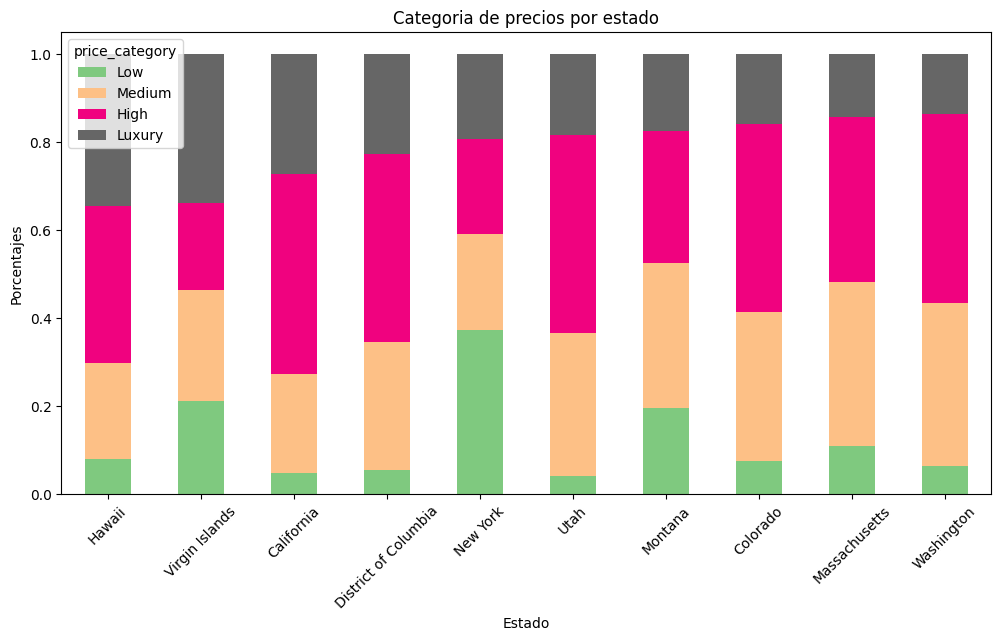

In [101]:
df2['price_category'] = pd.cut(df2['price'], bins=[0, 250000, 500000, 1000000, float('inf')],
                              labels=['Low', 'Medium', 'High', 'Luxury'])

state_price_cat = df2.groupby(['state', 'price_category']).size().unstack().fillna(0)

state_price_cat_pct = state_price_cat.div(state_price_cat.sum(axis=1), axis=0)

state_price_cat_pct.sort_values(by='Luxury', ascending=False).head(10).plot(
    kind='bar', stacked=True, figsize=(12,6), colormap='Accent')

plt.title('Categoria de precios por estado')
plt.ylabel('Porcentajes')
plt.xlabel('Estado')
plt.xticks(rotation=45);

El gráfico revela cómo la composición del mercado inmobiliario varía significativamente entre estados. Mientras estados como California, Hawaii y el Distrito de Columbia concentran una gran proporción de propiedades en los segmentos más caros, otros como Montana, Islas Vírgenes y Nueva York tienen una mayor presencia de propiedades económicas o medias.

Este tipo de segmentación es clave para entender el perfil económico del mercado en cada estado y para tomar decisiones basadas en oferta, demanda o modelos ajustados por rango de precios.

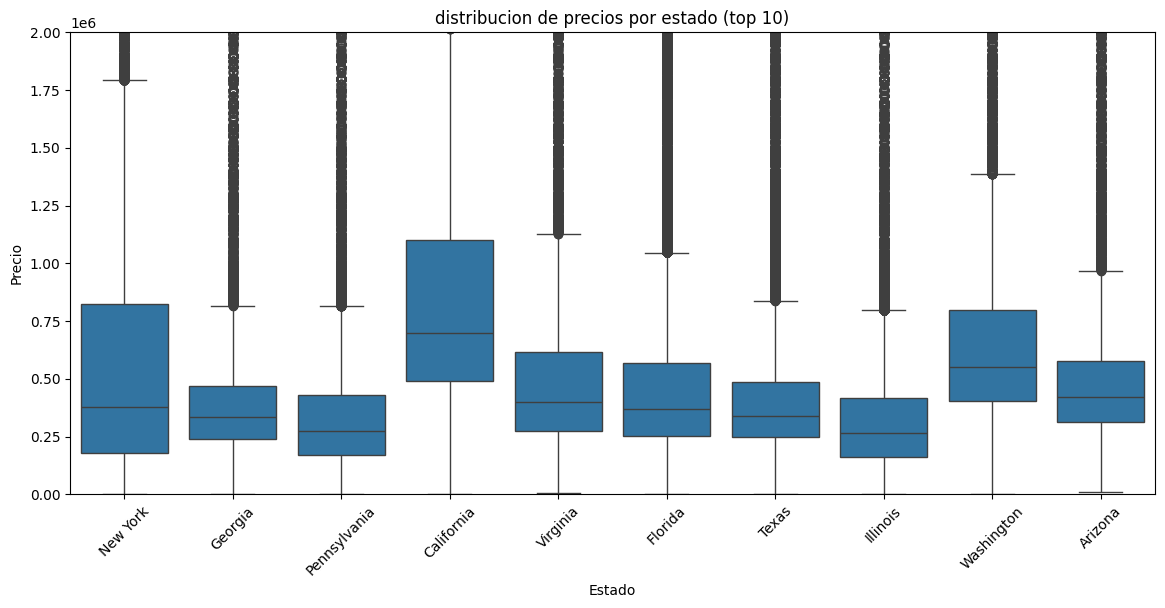

In [102]:
top_states = df2['state'].value_counts().head(10).index
df2_top_states = df2[df2['state'].isin(top_states)]

plt.figure(figsize=(14,6))
sns.boxplot(x='state', y='price', data=df2_top_states)
plt.ylim(0, 2_000_000)
plt.title('distribucion de precios por estado (top 10)')
plt.ylabel('Precio')
plt.xlabel('Estado')
plt.xticks(rotation=45);

El gráfico boxplot revela una alta dispersión de precios en todos los estados, con presencia significativa de valores atípicos (propiedades muy caras).

California destaca por tener la mediana de precio más alta, así como un rango intercuartílico más elevado, lo que confirma su mercado inmobiliario de alto valor. En cambio, Illinois y Pensilvania presentan precios más bajos y concentrados.

Nueva York muestra una distribución amplia, con una gran cantidad de valores extremos, lo que indica una fuerte heterogeneidad entre propiedades (desde económicas hasta de lujo).

En general, este gráfico demuestra que incluso dentro de los estados con más propiedades listadas, hay gran variabilidad interna de precios, lo que justifica análisis más segmentados (por ciudad, tipo de propiedad, etc.).

In [103]:
df2['is_luxury_home'] = df2['price'].apply(lambda x: 1 if x > 1_000_000 else 0)

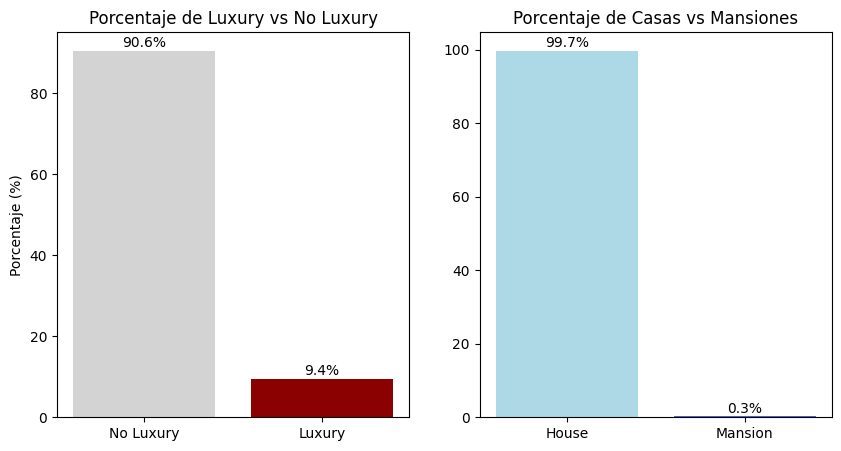

In [104]:
luxury_counts = df2['is_luxury_home'].value_counts(normalize=True) * 100
mansion_counts = df2['property_type'].value_counts(normalize=True) * 100

luxury_labels = ['No Luxury', 'Luxury']
mansion_labels = ['House', 'Mansion']

luxury_vals = [luxury_counts.get(0, 0), luxury_counts.get(1, 0)]
mansion_vals = [mansion_counts.get(0, 0), mansion_counts.get(1, 0)]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(luxury_labels, luxury_vals, color=['lightgray', 'darkred'])
axs[0].set_title('Porcentaje de Luxury vs No Luxury')
axs[0].set_ylabel('Porcentaje (%)')

axs[1].bar(mansion_labels, mansion_vals, color=['lightblue', 'royalblue'])
axs[1].set_title('Porcentaje de Casas vs Mansiones')

for ax in axs:
    for i, v in enumerate(ax.patches):
        ax.text(v.get_x() + v.get_width() / 2, v.get_height() + 1, f'{v.get_height():.1f}%', ha='center');

In [105]:
df2.drop(columns=['log_price'],inplace=True)
# Eliminamos variable de precio log

El análisis revela que solo el 9.4% de las propiedades tienen un precio superior al millón de dólares, clasificándolas como "Lujo", mientras que el 90.6% restante se mantiene en rangos más accesibles.

En cuanto al tamaño físico, menos del 0,3% de las propiedades se consideran "Mansión" (según el criterio de más de 10,000 pies²), lo que indica que este tipo de propiedades son extremadamente escasas en el conjunto de datos.

Esto sugiere que el mercado está fuertemente concentrado en viviendas de precio y tamaño moderado, y que tanto el lujo como las propiedades de gran tamaño representan nichos muy específicos dentro del conjunto total.

----------------------------------------------------

## Conlusiones e Insights.

## Durante el análisis exploratorio de datos (EDA) del dataset inmobiliario, se realizó una revisión exhaustiva que incluyó limpieza, segmentación, visualización univariante y bivariante. A continuación se resumen los principales hallazgos:

### Limpieza y transformación
Se detectaron múltiples valores atípicos, especialmente en price, house_sizey acre_lot. En lugar de eliminarlos, se aplicarán estrategias de segmentación (como agrupar mansiones o aplicar transformaciones logarítmicas) para preservar el valor analítico.

Se crearon variables categóricas como bed_group, bath_group, size_bin, y banderas binarias para detectar mansiones y propiedades de lujo (precio > 1M).

### Perspectivas univariantes
La mayoría de las propiedades tienen entre 2 y 4 habitaciones, 1 a 3 baños, y precios por debajo del millón de dólares.

Variables como price y house_sizepresentan distribuciones altamente sesgadas, con concentración en valores bajos y pocos casos extremos de lujo.

### Perspectivas bivariantes
Existe una relación directa y clara entre price y variables como bath, bed y especialmente house_size.

El tipo de propiedad influye significativamente en el precio: las mansiones y viviendas con más baños o tamaño son notablemente más costosas.

Estados como California, Hawaii y Nueva York concentran propiedades de alto valor, mientras que otros como Mississippi o Ohio predominan en el mercado de bajo costo.

Las ciudades más caras (Aspen, Rancho Santa Fe, etc.) evidencian nichos muy localizados del mercado de lujo.

### Insight especial: lujo y tamaño
Solo el 9.4% de las propiedades están clasificadas como "Lujo" (precio > 1M USD).

Menos del 0,3% del total se consideran "Mansiones" (superficie > 10.000 ft²).

Esto indica que el mercado está fuertemente concentrado en viviendas de precio y tamaño medio , siendo el segmento de lujo un nicho altamente específico.

### Conclusión final
El análisis evidencia que tanto el tamaño de la propiedad como su ubicación son los factores más determinantes del precio. La presencia de propiedades de lujo es limitada y está fuertemente concentrada en ciertos estados y ciudades. El tratamiento adecuado de outliers, segmentaciones y transformaciones permitió extraer insights más robustos y listos para modelado o decisiones de negocio.

In [108]:
df2 = df2.drop(df2.sample(n=570_000, random_state=42).index).reset_index(drop=True)


In [109]:
df2.to_csv('realtor-data.csv',index=False)